In [2]:
%matplotlib widget
import numpy as np

import os

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8')

In [77]:
od = 9
exp = 'cube78c_norest_data'
data = np.load('exp_{0}_data_{1}.npz'.format(exp, od), allow_pickle=True)

# print(data.files)  
#['joint_pos', 'joint_vel', 'joint_torque', 'joint_ref', 'lfinger_force', 'rfinger_force', 'gripper_vel', 'cube_pos', 'cube_quat', 'cube_linvel', 'cube_angvel', 'obs_vector', 'actions']

joint_pos = data['joint_pos'].squeeze()
joint_vel = data['joint_vel'].squeeze()
joint_torque = data['joint_torque'].squeeze()
joint_ref = data['joint_ref'].squeeze()
lfinger_force = data['lfinger_force'].squeeze()
rfinger_force = data['rfinger_force'].squeeze()
gripper_vel = data['gripper_vel'].squeeze()
cube_pos = data['cube_pos'].squeeze()
cube_quat = data['cube_quat'].squeeze()
cube_linvel = data['cube_linvel'].squeeze()
cube_angvel = data['cube_angvel'].squeeze()
obs_vector = data['obs_vector'].squeeze()
actions = data['actions'].squeeze()
err = joint_ref - joint_pos



upper limit violation
lower limit violation
velocity violation


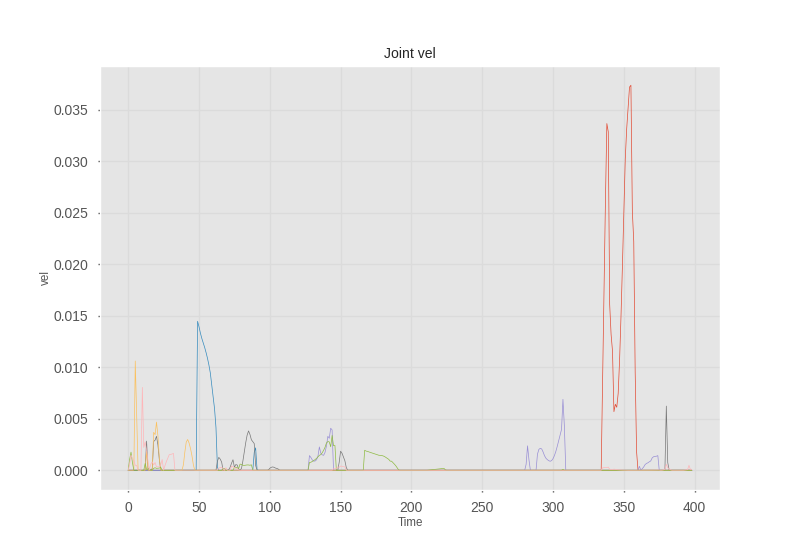

In [78]:
franka_joint_upper_limits = np.array([2.8973, 1.7628, 2.8973, -0.0698, 2.8973, 3.7525, 2.8973])
franka_joint_lower_limits = np.array([-2.8973, -1.7628, -2.8973, -3.0718, -2.8973, -0.0175, -2.8973])

#print(np.where(joint[:,:7] > franka_joint_upper_limits, 1, 0))
if not np.sum(np.where(joint_pos[:,:7] >= franka_joint_upper_limits*0.8, 1, 0)):
    print('no upper limit violation')
else:
    print('upper limit violation')
if not np.sum(np.where(joint_pos[:,:7] <= franka_joint_lower_limits*0.8, 1, 0)):
    print('no lower limit violation')
else:
    print('lower limit violation')


franka_joint_vel_limits = np.array([2.1750, 2.1750, 2.1750, 2.1750, 2.6100, 2.6100, 2.6100])


if not np.sum(np.where(np.abs(joint_vel[:,:7]) >= franka_joint_vel_limits*1.0, 1, 0)):
    print('no velocity violation')
else:
    print('velocity violation')
    # Compute how much the velocity is saturated
    exeededlimits = np.maximum(np.abs(joint_vel[:,:7]) - franka_joint_vel_limits, 0)
    plt.figure()
    plt.plot(exeededlimits)
    plt.title('Joint vel')
    plt.xlabel('Time')
    plt.ylabel('vel')
    plt.show()  




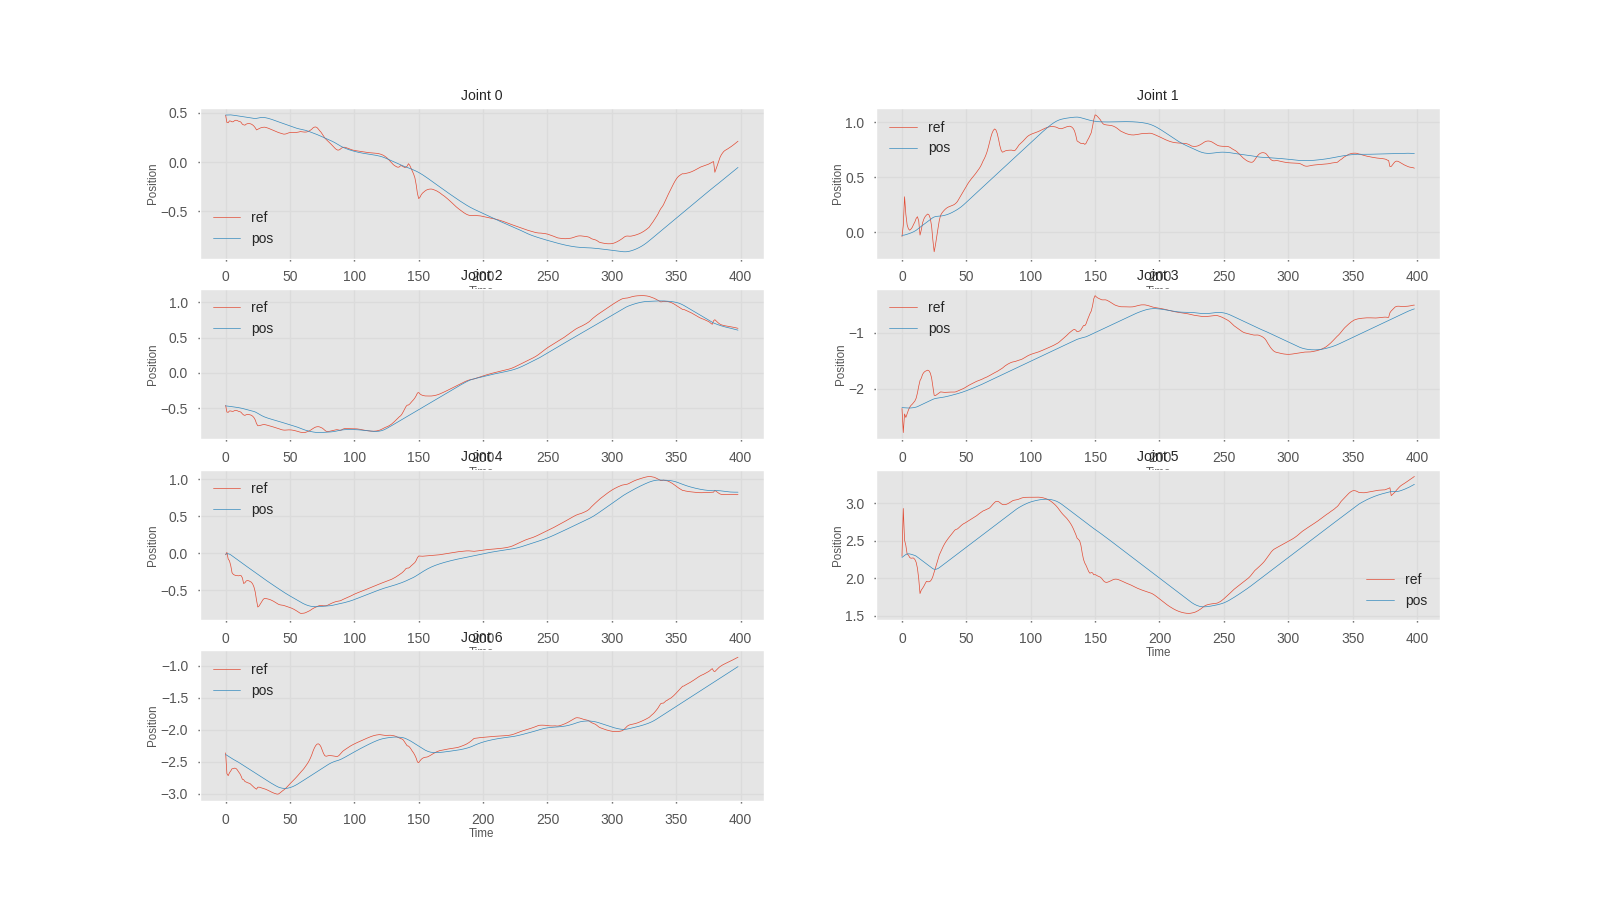

In [79]:
## Plot References
plt.figure(figsize=(16, 9))

for i in range(7):
    plt.subplot(4,2,i+1)
    plt.plot(joint_ref[:,i])
    plt.plot(joint_pos[:,i])
    plt.title('Joint {0}'.format(i))
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend(['ref', 'pos'])

plt.show()


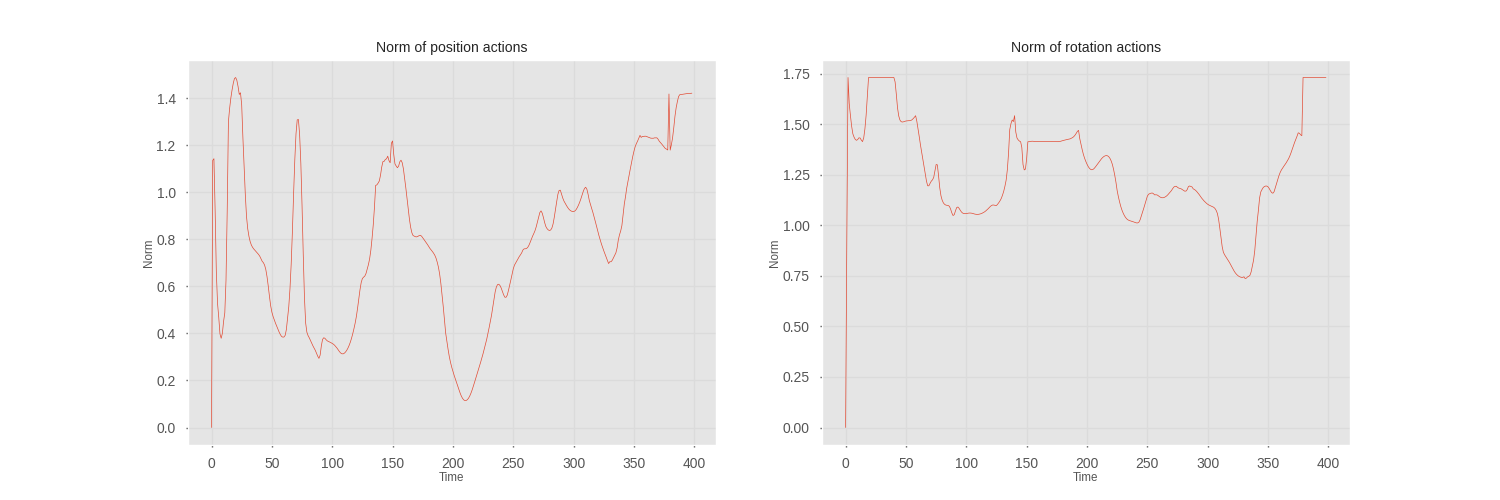

In [80]:
## Visualize norm of actions
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.linalg.norm(actions[:, 0:3], axis=1))
plt.title('Norm of position actions')
plt.xlabel('Time')
plt.ylabel('Norm')

plt.subplot(1,2,2)
plt.plot(np.linalg.norm(actions[:, 3:6], axis=1))
plt.title('Norm of rotation actions')
plt.xlabel('Time')
plt.ylabel('Norm')
plt.show()



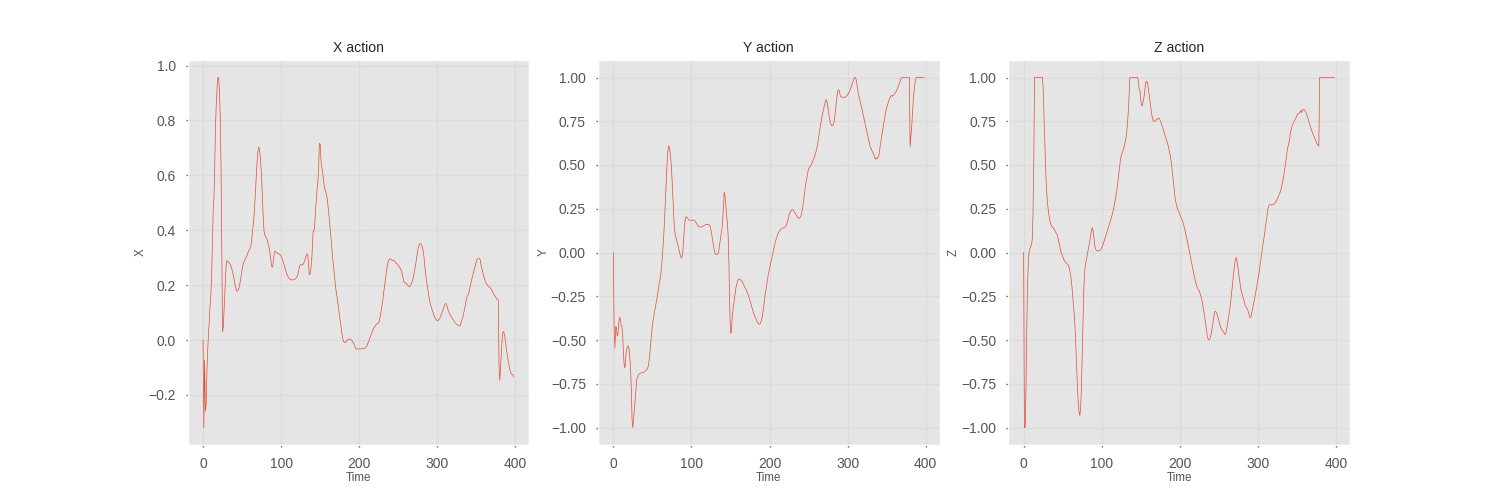

In [81]:
## Plot x,y,z references (actions)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(actions[:, 0])
plt.title('X action')
plt.xlabel('Time')
plt.ylabel('X')

plt.subplot(1,3,2)
plt.plot(actions[:, 1])
plt.title('Y action')
plt.xlabel('Time')
plt.ylabel('Y')

plt.subplot(1,3,3)
plt.plot(actions[:, 2])
plt.title('Z action')
plt.xlabel('Time')
plt.ylabel('Z')
plt.show()

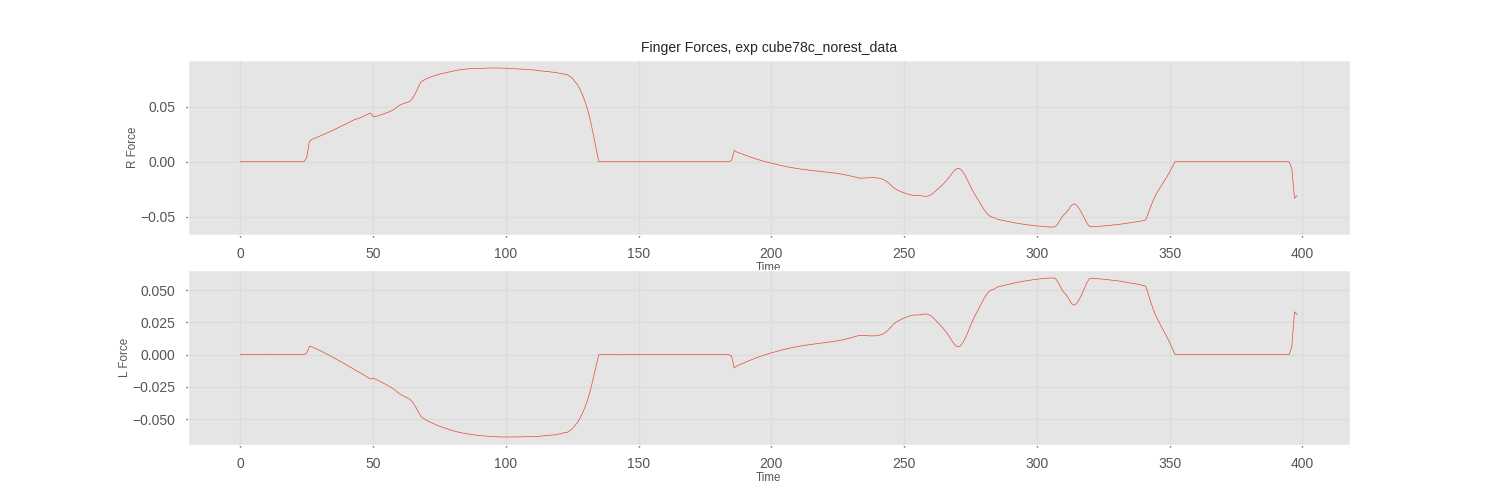

In [82]:
lfinger_forces = data['lfinger_force'].squeeze()
rfinger_forces = data['rfinger_force'].squeeze()

plt. figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(rfinger_forces[:, 2])
plt.title('Finger Forces, exp {0}'.format(exp))
plt.xlabel('Time')
plt.ylabel('R Force')

plt.subplot(2, 1, 2)
plt.plot(lfinger_forces[:, 2])
plt.xlabel('Time')
plt.ylabel('L Force')
plt.show()

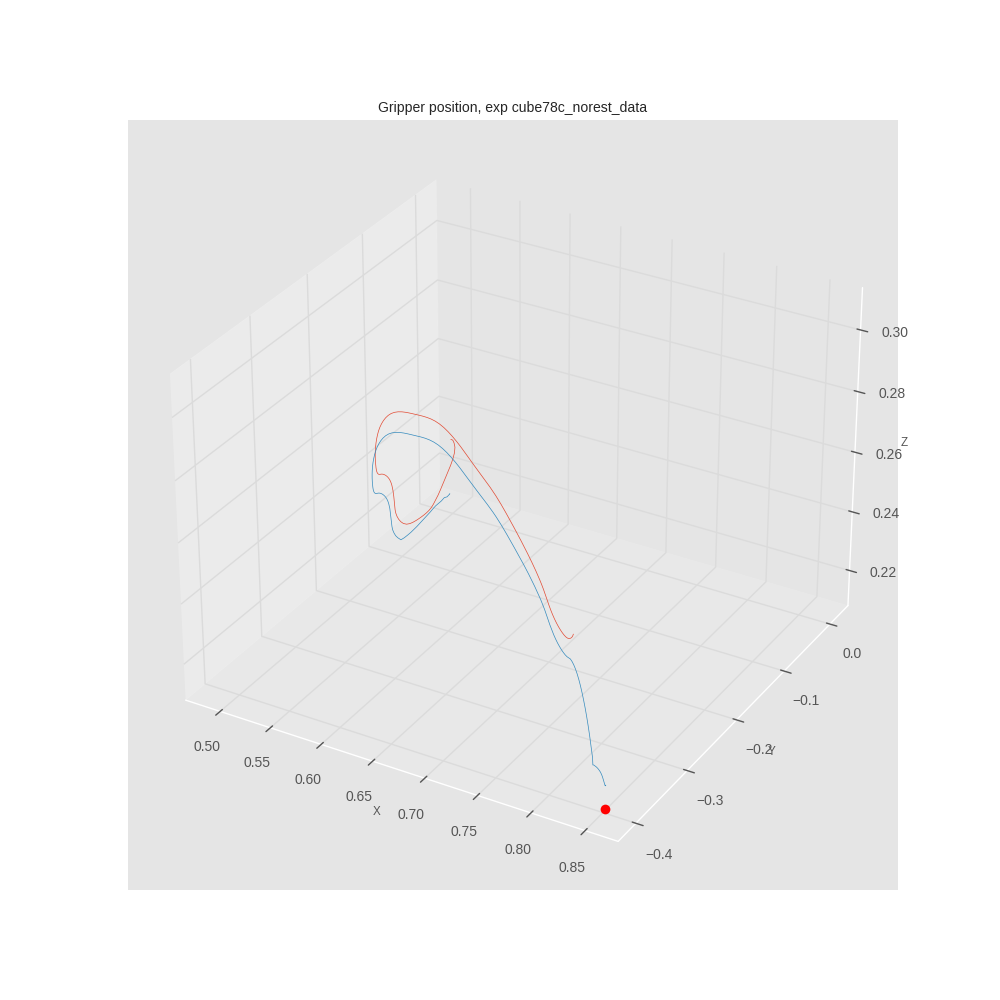

In [89]:
## Plot in 3d gripper position
from mpl_toolkits.mplot3d import Axes3D

# integrate gripper_vel to get gripper_pos
gripper_pos = data['gripper_pos'].squeeze()


last_idx = 140

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gripper_pos[:last_idx,0], gripper_pos[:last_idx,1], gripper_pos[:last_idx,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# add cube pos in red
ax.plot(cube_pos[:,0], cube_pos[:,1], cube_pos[:,2])
plt.title('Gripper position, exp {0}'.format(exp))

d_to_goal = obs_vector[:, 17:20]
goal_pos = d_to_goal[0] + cube_pos[0]
ax.plot([goal_pos[0]], [goal_pos[1]], [goal_pos[2]], 'ro')

plt.show()

No gripper velocity violation


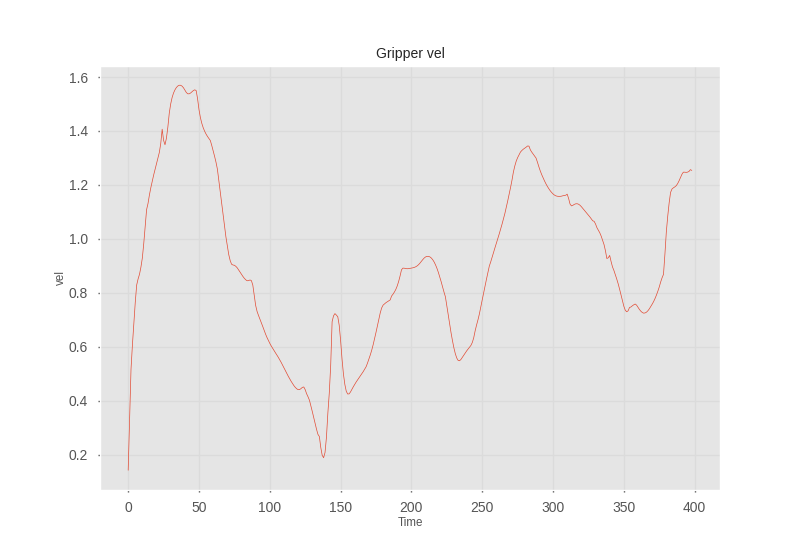

In [84]:
# print when gripper vel is higher than 1.7
if not np.sum(np.where(np.linalg.norm(gripper_vel, axis=1) > 1.7, 1, 0)):
    print('No gripper velocity violation')
else:
    print('Gripper velocity violation')
plt.figure()
plt.plot(np.linalg.norm(gripper_vel, axis=1))
plt.title('Gripper vel')
plt.xlabel('Time')
plt.ylabel('vel')
plt.show()


In [85]:
plt.style

<module 'matplotlib.style' from '/home/darko/.local/lib/python3.8/site-packages/matplotlib/style/__init__.py'>